**the essence of Machine learning and deep learning is to take some data from past .build an algorithm(like Linear regression ) to discover patterns in it and use the discovered patterns to predict the future**

**to make end to end linear regression model we will follow this workflow**

**WorkFlow**
0. **import important liberaries**
1. **Get Data Ready (turn into tensors)**
2. **Build a Model**
3. **pick a loss function and optimizer**
4. **build a training loop**
5. **evalute your model**
6. **test model with new data point**
7. **save the model**  

***so lets start***

# **0. Important Libraries for our work**

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# **Import torch**
**Import torch** (also, visit the PyTorch website). The torch package contains data structures for multi-dimensional tensors and defines mathematical operations over these tensors. Simply put, it helps in creating and manipulating tensors. Watch my first video to understand it better.

# **Import torch.nn as nn**
**Import torch.nn** as nn (visit the PyTorch website for more details). The nn module stands for 'neural network,' and this package contains the building blocks for creating neural networks in PyTorch. It includes utility classes essential for constructing neural networks. This should help you in developing your own neural network models.

**import numpy as np**<br>
here we are using it to create our data

**import matplotlib.pyplot as plt**<br>
for visulzation the data



# **1. Get Data Ready(turn into tensors )**

**1.1 first get or create your data** ,<br>
**like here is our data**

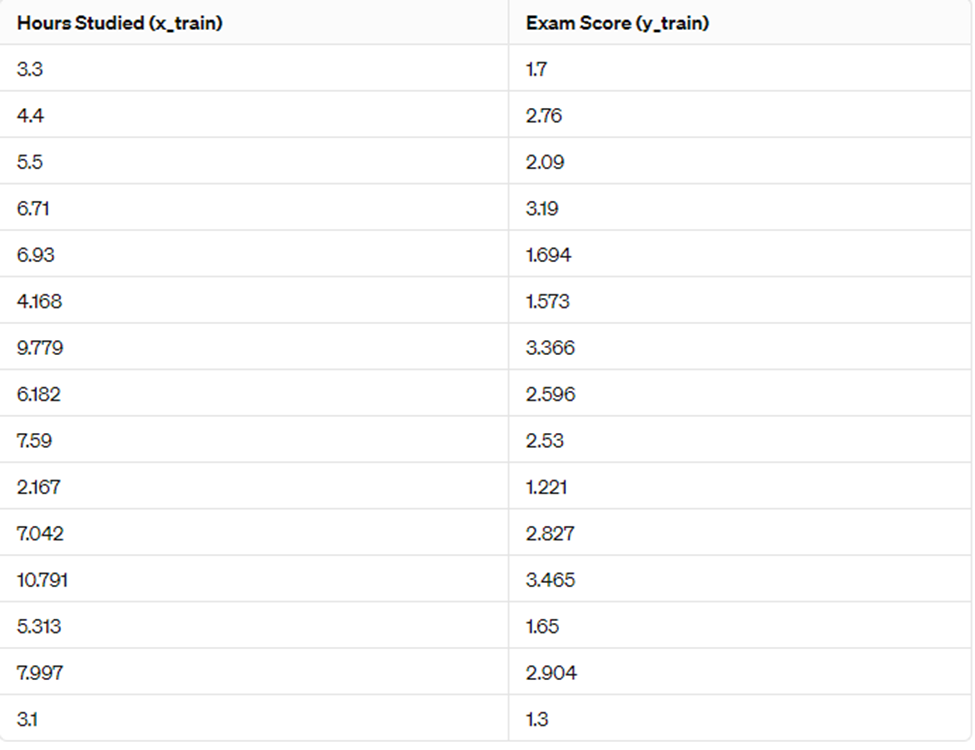

**A neural network could learn from this dataset to predict the exam score given a new "Hours Studied" value**.<br>
.......................................................<br>
 For instance, if a student studied for 8 hours, the neural network would predict the exam score based on the learned relationship between study hours and scores from the given data.<br>
 ........................................................<br>

**This predictive model could be useful for students to plan their study schedules according to desired exam score outcomes**.

...................<br>

**1.2 Lets convert our data in numpy arrays**

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

here **x_train** is our **Hours Studied**<br>
and<br>
**y_train** is our **Exam Score**

**1.3 Lets Visulize this data to understand it more**

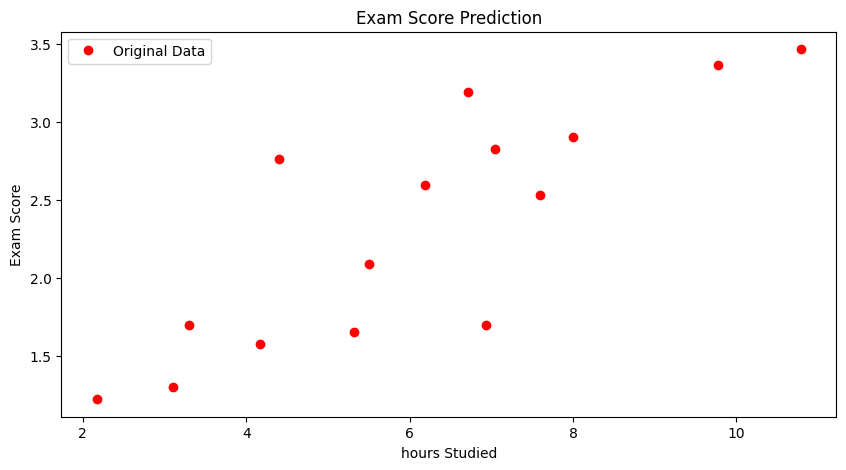

In [3]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train,y_train,'ro',label='Original Data')
plt.xlabel('hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

as you know that for traning the neural network for regression we have to inputs and target<br>
                                                                            just assume **x_train** is your **inputs(like features)**<br>
                                                                            and **x_test** is your target **labels (targets)**

**1.4 Convert numpy arrays into Pytorch tensors**

In [4]:
x_train=torch.from_numpy(x_train)
y_train=torch.from_numpy(y_train)
x_train,y_train

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 3.1000]]),
 tensor([[1.7000],
         [2.7600],
         [2.0900],
         [3.1900],
         [1.6940],
         [1.5730],
         [3.3660],
         [2.5960],
         [2.5300],
         [1.2210],
         [2.8270],
         [3.4650],
         [1.6500],
         [2.9040],
         [1.3000]]))

# **2.Build a Linear Regression  Model**

In [5]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(1,1)

  def forward(self,x):
    out=self.linear(x)
    return out

# **Class:**

First, we create our LinearRegression class using Python's object-oriented programming. In a class, we define a set of rules that only objects can access. The code inside the class will not execute until you create an instance of it. Within the class, a function is referred to as a method.

# **LinearRegression:**

It is just a class name; you can choose any name you like.

# **(nn.Module):**<br>
nn.Module is the parent class from which we are inheriting. As you know, we are using nn.Linear(1,1), which creates a linear layer with one input and one output, and it initializes weights and biases among other things. But how does nn.Linear accomplish this in our class, since we aren't hardcoding anything? We're simply passing (1,1) to nn.Linear, and it constructs the neural network for us. Is this done by magic? Not really. It's all thanks to nn.Module, which we are inheriting. In PyTorch, the developers have already written classes for everything; we just have to inherit from them and use the specific methods and functions they provide, such as nn.Linear, nn.Sequential, or nn.Dropout. All these are contained within nn.Module, which we are inheriting.<br>

Then, we inherit the base class (nn.Module) from PyTorch.<br>

**Subclass nn.Module:** This contains all the building blocks for neural networks. It is the basic foundation for creating a PyTorch model by subclassing nn.Module.<br>

**Utility Functions:** nn.Module includes different classes that help you build neural network models. All models in PyTorch inherit from the subclass nn.Module, which has useful methods like parameters(), train(), and others. The torch.nn module also includes various layers that you can use to construct your neural network.

# **def __init__()**<br>

Here, we are initializing our constructor. A constructor is a special method that is automatically executed when an object is created. There's no need to call it manually like the forward method or other methods.

Essentially, when you create an object of the class, the constructor is executed automatically. This constructor sets up the neural network by initializing the weights and biases. However, for this neural network to operate, we must call the forward method by passing data, which typically occurs in the training and testing loops.

# **self**<br>

self refers to the current object, but why is it necessary?

In a class, methods can't be accessed directly; they can only be accessed through objects. So, what if one method inside a class needs to communicate with another method? Since everything inside a class is accessible only through objects, we need a way for methods to refer to the current object. That's where self comes in.

In every method, we include self as an argument. When we want to receive the object inside a method, we define a positional variable (or argument) and name it self. However, self is not mandatory; you can give it any name you prefer. The important thing is that it represents the current object within the class.

# **super().__init__()**<br>

Our class (the child class) has a constructor, and nn.Module (the parent class) has its own constructor. If only the child class's constructor is called, the parent class's constructor will not be initialized automatically. However, we need the parent class’s constructor to properly initialize everything that nn.Module handles.

To initialize the nn.Module class constructor, we use super().__init__(). This ensures that the constructor of the parent class (nn.Module) is also called when our class's constructor is executed. By using super().__init__(), we initialize all components that are defined within the parent class's constructor.

This is commonly used to call the constructor of the base class (nn.Module), allowing our class to inherit all its properties and methods properly.

# **nn.Linear(1,1)**<br>

Instead of initializing the weights and biases manually, we can define the model using the nn.Linear class from PyTorch, which handles this automatically. Here, we are initializing our weights and biases for the neural network. The parameters (1,1) represent the number of input features and the number of output targets, respectively.

In this case, in_features is the number of dimensions your input data has, and out_features is the number of dimensions you'd like for the output. In our class, both of these values are 1.

# **def forward(self, x):**<br>

In our parent class, there is also a forward method. However, we need to override that method by creating our own forward method in the child class. This overrides the parent class’s forward method, meaning the parent's method won't be executed; instead, the child class's method will take precedence. This is a core concept of inheritance in object-oriented programming.

If both the parent (nn.Module) and the child class (our class) have a method with the same name, then the method defined in the child class will be executed.

**how it works?**<br>
It is essential to override the forward method because it defines the specific computation that occurs when the model processes input data. This method is necessary for all subclasses of nn.Module, as it outlines the computation performed on the data passed to the model (e.g., the linear regression formula).
<br>

The forward method instructs the neural network on how to perform calculations on the input (which are tensors full of data) within nn.Module blocks.


The forward method is invoked when we use the neural network to make a prediction, also known as running the forward pass. In this process, information flows from the input through any hidden layers to the output.


In practice, the forward method is executed through the __call__ function of nn.Module. This means when you run model(input), it internally calls the forward method to process the input.

By defining the forward method, we specify how the input data is transformed and passed through the network, ensuring that our model behaves as intended.

# **out = self.linear(x)**<br>
In the line **out = self.linear(x)**, we are passing the data x to self.linear, which computes the linear regression operation wx+b. The result of this computation is stored in the variable out. This process is akin to feeding the input data x into the linear regression model, where it undergoes the computation wx+b, and the resulting output is assigned to out.

# **return out**
In the line **return out** within the forward method of our LinearRegression class, the output out is returned. This output is the result of the linear regression computation  wx+b performed earlier in the method. We will receive this output after initializing the model and providing input data during the training loop, specifically during the forward pass. This step ensures that the processed data, after being computed by the model, is forwarded for further use, such as calculating loss or making predictions.

In [6]:
model=LinearRegression() #creating object or (instance) for our class

When we execute model = LinearRegression(), we're creating an object or instance of our LinearRegression class. This object has access to all the properties and methods defined within the class.

To clarify, when we create a variable like model, we're essentially creating a reference variable. This variable doesn't contain the object itself; instead, it holds the memory address of the object. So, model is not the object itself; rather, it's a reference to the object.

When we call LinearRegression(), a new object is created, and the reference to that object is stored in the variable model. This allows us to access and manipulate the object's properties and methods using the model variable. In summary, model is a reference variable that points to the object created by the LinearRegression() call.

In [7]:
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [8]:
list(model.parameters())

[Parameter containing:
 tensor([[0.9129]], requires_grad=True),
 Parameter containing:
 tensor([0.7890], requires_grad=True)]

# **3 Pick A Loss Function And Optimizer**

In [9]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-4) #0.0001

# **loss Function**<br>
defining **loss function** which will be used for calculating loss during training<br>
measures how wrong  your models prediction (predicted ,actual),lower thebetter <br>
pytorch has plenty of built-in loss functions in torch.nn

# **Optimizer:**
The optimizer plays a crucial role in guiding the model's learning process by updating its internal parameters to minimize the loss function. In essence, it determines how the model's parameters stored in nn.Parameter should be adjusted to improve gradient descent and consequently reduce the loss.

In PyTorch, you can access various optimization algorithms through the torch.optim module. These optimization methods provide implementations of popular algorithms such as Stochastic Gradient Descent (SGD), Adam, and RMSprop, among others. By selecting an appropriate optimizer and tuning its hyperparameters, you can effectively train your model to better represent the input data and improve its performance on the task at hand.

# **Model Parameters:**
PyTorch models provide a convenient .parameters() method, which returns a list containing all the weight matrices and bias vectors present in the model. For our linear regression model, this list would typically consist of one weight matrix and one bias vector.

By accessing model.parameters(), you obtain a handle to the model's parameters that you'd like to optimize during training. These parameters include the weights and biases, which are initially randomly set before training begins. Optimizing these parameters involves adjusting them iteratively to minimize the loss function, ultimately improving the model's performance on the given task.

# **Learning Rate (lr):**
The learning rate is a critical hyperparameter that determines the size of the updates made to the model parameters during optimization. It influences the convergence speed and stability of the training process.

A higher learning rate means the optimizer will attempt larger updates to the parameters, which can speed up convergence. However, setting the learning rate too high may cause the optimizer to overshoot the optimal values or even fail to converge.

Conversely, a lower learning rate results in smaller parameter updates, which can lead to more stable optimization. However, excessively small learning rates may cause the optimization process to progress too slowly.

Common starting values for the learning rate include 0.01, 0.001, and 0.0001, but these values can be adjusted based on the specific problem and model characteristics. Additionally, learning rate scheduling techniques can be employed to dynamically adjust the learning rate during training, further optimizing the convergence process over time.

**Note**  that model.parameters() is passed as an argument to optim .SGD so that the optimizer knows which matrices should be modified during the update step.also ,we can specify a learning rate that controls the amount by which the parameters are modified

# **4.Build A Training Loop**

its now time to create training loop <br>
the training loop invloves the model going through the training data and learning the relationships between the featres and the labels.each of these is called a loop because we want our model to look (loop through ) at each sample in each dataset.

In [10]:
num_epochs=1000

Hyperparameter ,you can change it ,means for how many time you will go through in your data to find the good patterns

In [11]:
for epoch in range(num_epochs):
  model.train()
  out=model(x_train)
  loss=criterion(out,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch +1 ) % 20 == 0:
    print(f'Epoch: [{epoch +1 } / {num_epochs}],Loss: { loss.item():.6f}')

Epoch: [20 / 1000],Loss: 13.380795
Epoch: [40 / 1000],Loss: 9.506445
Epoch: [60 / 1000],Loss: 6.768266
Epoch: [80 / 1000],Loss: 4.833074
Epoch: [100 / 1000],Loss: 3.465386
Epoch: [120 / 1000],Loss: 2.498780
Epoch: [140 / 1000],Loss: 1.815636
Epoch: [160 / 1000],Loss: 1.332826
Epoch: [180 / 1000],Loss: 0.991604
Epoch: [200 / 1000],Loss: 0.750446
Epoch: [220 / 1000],Loss: 0.580010
Epoch: [240 / 1000],Loss: 0.459554
Epoch: [260 / 1000],Loss: 0.374423
Epoch: [280 / 1000],Loss: 0.314257
Epoch: [300 / 1000],Loss: 0.271735
Epoch: [320 / 1000],Loss: 0.241682
Epoch: [340 / 1000],Loss: 0.220443
Epoch: [360 / 1000],Loss: 0.205432
Epoch: [380 / 1000],Loss: 0.194823
Epoch: [400 / 1000],Loss: 0.187325
Epoch: [420 / 1000],Loss: 0.182025
Epoch: [440 / 1000],Loss: 0.178280
Epoch: [460 / 1000],Loss: 0.175633
Epoch: [480 / 1000],Loss: 0.173762
Epoch: [500 / 1000],Loss: 0.172440
Epoch: [520 / 1000],Loss: 0.171505
Epoch: [540 / 1000],Loss: 0.170844
Epoch: [560 / 1000],Loss: 0.170377
Epoch: [580 / 1000],Los

# **for epoch in range(num_epochs):**
For each epoch in the range of num_epochs, we pass the data through the model. An epoch refers to one complete pass of the entire dataset through the model. In this loop, we repeat this process for a specified number of epochs, for example, 100 epochs would mean the data passes through the model 100 times. Each iteration within this loop is called an epoch.

# **model.train()**
The command model.train() puts the model into training mode. This is particularly important for models that have different behaviors during training versus testing phases, such as Dropout or BatchNorm layers. In training mode, these layers behave as expected during the learning process, which involves activating their specific functionalities like dropout regularization.

# **out = model(input)**
The line **out = model(input)** initiates a forward pass, where the input data is passed through the model. This triggers the execution of the forward() method defined within the model object. During this process, the model computes its forward calculations based on the input data. This operation allows the model to process all of the training data once, performing the necessary computations defined by its forward() method.

# **loss = criterion()**
The line **loss = criterion()** calculates the loss value, which indicates how inaccurate the model's predictions are compared to the ground truth. To evaluate the model's performance, we compare its predictions with the actual targets.

This comparison involves several steps:<br>

The model's predictions are compared to the ground truth, resulting in a difference matrix.<br>
Each element in the difference matrix is squared to remove negative values.
The average of all the squared elements in the resulting matrix is calculated.
The resulting value is a single number known as the mean squared error (MSE). It serves as a measure of how well the model is performing, with lower MSE values indicating better performance. This metric provides a baseline for assessing the model's accuracy and guides further improvements to the model.

# **optimizer.zero_grad()**
The line **optimizer.zero_grad()** resets the gradients of all optimized parameters to zero. This step is crucial because gradients in PyTorch accumulate by default across iterations. Without resetting the gradients, the new gradient values computed during backpropagation would be added to the existing gradients from previous iterations, which could lead to incorrect model updates and erratic behavior.

To ensure that each training step starts with a clean slate, we explicitly zero the gradients at the beginning of the loop. This allows the optimizer to correctly compute updates for the current training step only. By resetting the gradients, we avoid the risk of accumulating error over time, which helps stabilize the training process.

# **loss.backward()**
The method **loss.backward()** initiates backpropagation, computing the gradients of the loss with respect to all model parameters that have requires_grad=True. This process is crucial for updating the parameters during training.

In PyTorch, the gradients of the loss with respect to the parameters are automatically computed due to the requires_grad attribute being set to True on those parameters. These gradients are stored in the .grad property of each tensor.

The act of calling loss.backward() triggers the backward pass, where the gradient information flows backward through the network—from the output back to the inputs. This reverse flow allows PyTorch to calculate the partial derivatives of the loss with respect to each parameter, effectively enabling the optimizer to adjust the parameters in a way that minimizes the loss. This step is vital for learning optimal parameters that improve model performance over time.

# **optimizer.step()**
The **optimizer.step()** method updates the parameters of the model with respect to the gradients calculated by loss.backward().

During training, the optimizer, typically an instance of gradient descent optimization algorithm like stochastic gradient descent (SGD), adjusts the parameters with requires_grad=True based on the gradients of the loss function. This adjustment aims to improve the parameters iteratively towards minimizing the loss.

Instead of manually manipulating the model's weights and biases using gradients, we utilize the optimizer—such as optim.SGD—to perform these updates automatically. The term "stochastic" in SGD signifies that the samples are selected in random batches rather than as a single group. This random selection aids in converging to an optimal solution efficiently.

By calling optimizer.step(), we execute the parameter update process defined by the optimization algorithm, effectively adjusting the parameters to minimize the loss and improve the model's performance. This automated update process simplifies training and ensures that the model learns effectively from the training data.








# **But why did the loss go down ?**
The reduction in loss is primarily due to the updates made to the model's internal parameters (weights and biases) which better align with the underlying patterns in the data.

**But how exactly does the loss decrease?**<br>

As we know, we need to adjust the weights and biases to minimize the loss. The loss function is essentially a quadratic function of these parameters, and our goal is to find the configuration of weights and biases where the loss is at its minimum. If we were to graph the loss with respect to any individual weight or bias, it would typically appear as a parabola.<br>

An essential insight from calculus is that the gradient of a function at a point indicates the rate of change, or slope, of that function at that point with respect to the weights and biases. Here’s what this means in our context:<br>



# **If a gradient element is positive:**<br>
Increasing the weight slightly will increase the loss.<br>
Decreasing the weight slightly will decrease the loss.<br>


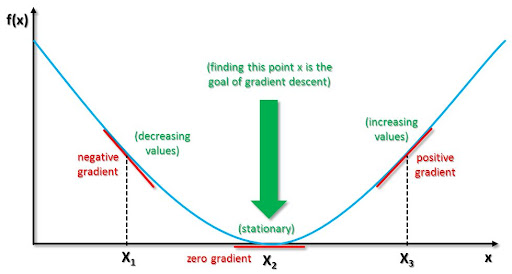

# **If a gradient element is negative**:<br>
Increasing the weight slightly will decrease the loss.<br>
Decreasing the weight slightly will increase the loss.<br>


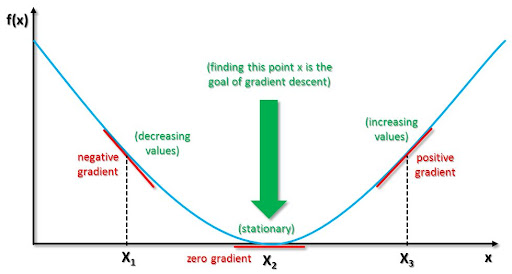

The effect of changing a weight on the loss is directly proportional to the gradient of the loss with respect to that weight. This observation is the cornerstone of the gradient descent optimization algorithm, which we use to enhance our model by navigating down the gradient.<br>

To achieve this, we adjust each weight by subtracting a small quantity proportional to the derivative of the loss with respect to that weight. This step size is multiplied by a small number, often referred to as the learning rate (e.g., 0.0001), to ensure that we do not alter the weights too drastically. This careful adjustment allows us to take small steps in the direction that reduces the loss, rather than making overly large adjustments. This number, the learning rate, is crucial as it determines the size of the steps we take on this gradient descent journey, balancing between speed and accuracy of convergence.

# **5.Evaluate Your Model**

the testing loop inolves going through the testing data and evaluating how good the patterns are that the model learned on the training data <br>
None:
<br>
usually , the model never see's the testing data during training , but here we are giving the training data for testing , but when you do try to use different data from training data

In [12]:
model.eval() # Set the model to evaluation mode
with torch.no_grad():
  predict=model(x_train)# Make predictions using the model on the training data
predict.data.numpy()# Convert the predictions to a NumPy array for easier manipulation and evaluation outside PyTorch

array([[1.5796492],
       [1.8736861],
       [2.1677227],
       [2.4911633],
       [2.5499706],
       [1.811671 ],
       [3.311526 ],
       [2.3500257],
       [2.7263927],
       [1.2767912],
       [2.5799088],
       [3.58204  ],
       [2.1177366],
       [2.8351865],
       [1.5261879]], dtype=float32)

# **model.eval()**
**model.eval()** is a PyTorch method that switches the model to evaluation mode. It's crucial for ensuring consistent behavior during testing by deactivating features like dropout and batch normalization, which are only needed during training. This function ensures stable and reliable model outputs for testing on new data, promoting better generalization beyond the training set.

# **torch.no_grad()**
We use `**torch.no_grad()**` to indicate to PyTorch that we do not need to track, calculate, or modify gradients when making predictions or evaluating the model. This context manager is useful because it temporarily sets all the `requires_grad` flags to false. This can be particularly beneficial for memory savings and computational efficiency, as it prevents the creation of the computational graph during operations like forward passes through the network, which are unnecessary when you're not planning to perform backpropagation. This is especially important during model evaluation and when making predictions on new data.

Notice the testing loop doesn't contain performing backpropagation (loss.backward()) or stepping the optimizer (optimizer.step()), this is because no parameters in the model are being changed during testing, they've already been calculated. For testing, we're only interested in the output of the forward pass through the model.

# **5.1 visulize our model performance**

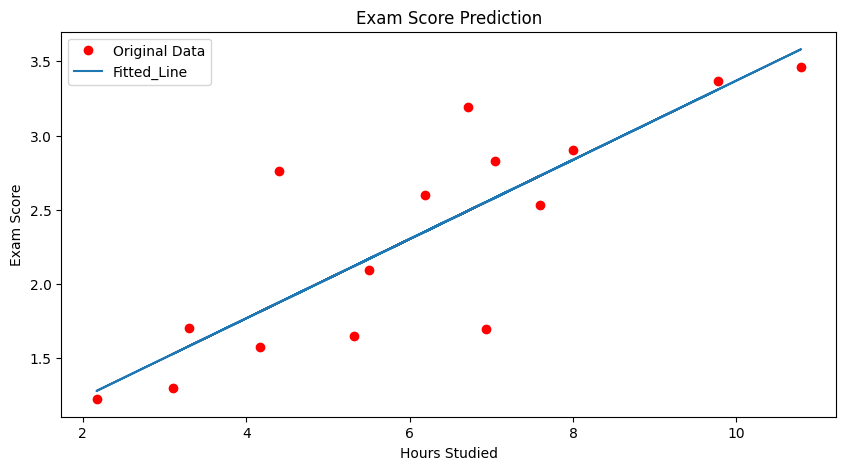

In [13]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original Data')
plt.plot(x_train.numpy(),predict,label='Fitted_Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

**as you can see it adjust its weight and bias parameter for best fit line**

In [14]:
list(model.parameters())

[Parameter containing:
 tensor([[0.2673]], requires_grad=True),
 Parameter containing:
 tensor([0.6975], requires_grad=True)]

# **6.Test Model With New Data**

In [15]:
new_hours_studied=8.0
new_hours_tensor=torch.tensor([[new_hours_studied]],dtype=torch.float32)

In [16]:
model.eval()
with torch.no_grad():
  new_exam_score=model(new_hours_tensor)
print('predicted exam score for a student who studied for 8 hours', new_exam_score.item())

predicted exam score for a student who studied for 8 hours 2.8359882831573486


**6.1 visulize new datapoint**

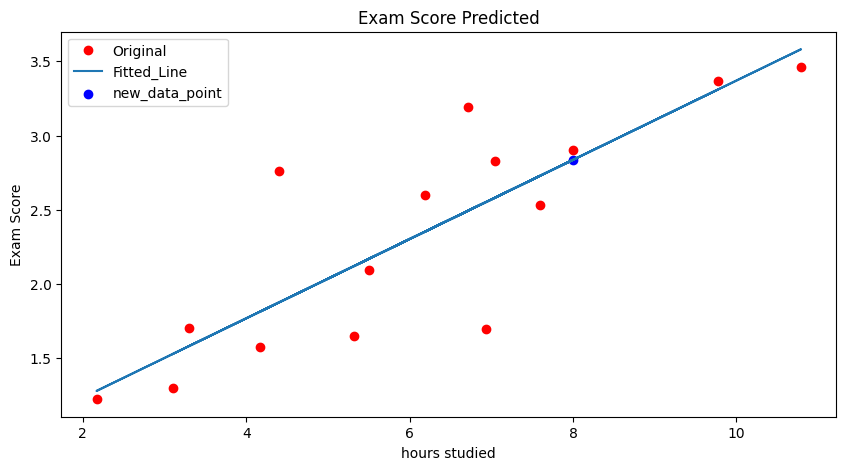

In [17]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original')
plt.plot(x_train.numpy(),predict,label='Fitted_Line')
plt.scatter([new_hours_studied],[new_exam_score.item()],color='blue',label='new_data_point')
plt.xlabel('hours studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Predicted')
plt.show()

# **7.Save The Model**

In [18]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.2673]])),
             ('linear.bias', tensor([0.6975]))])

To save the model, it's recommended to use the **state_dict()** method, which returns a dictionary containing learned parameters like weights and biases. This dictionary represents the model's state but not the entire model architecture.

In [19]:
torch.save(model.state_dict(),'./linearRegression.pth')

Here's what each part of the torch.save() function does:

1. Specify what you want to save using model.state_dict(), which captures the learned parameters.
2. Indicate where you want to save the state dictionary by providing a file path, such as ./linearRegression.pth. This file will store the model's learned parameters for future use.